In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Dropout
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", header=None)

In [130]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [115]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


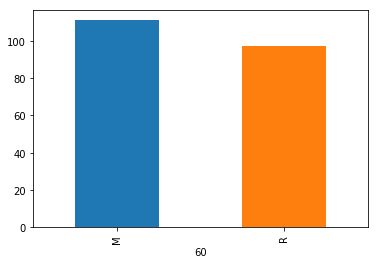

In [129]:
df.groupby(60).size().plot.bar()
plt.show()

In [4]:
def plot_at_iloc(x):
    X = range(60)
    y = df.values[x][:-1]
    plt.plot(X,y)
    print("Your sonar detect " + str(df.values[x][-1]))

Your sonar detect R
Your sonar detect R
Your sonar detect R


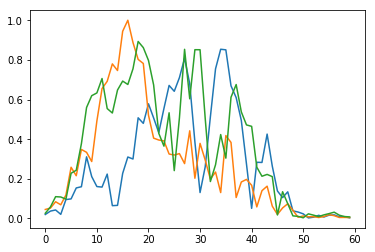

In [113]:
# A rock plot looks like
for i in range(3):
    plot_at_iloc(i)

Your sonar detect M
Your sonar detect M
Your sonar detect M


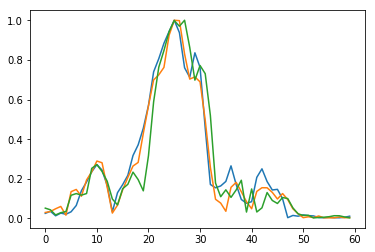

In [114]:
# A mine plot looks like
for i in range(1,4):
    plot_at_iloc(-i)

In [5]:
import random
dataPoints = random.sample(range(200), 100)

In [6]:
def R_or_M(x):
    return str(df.values[x][-1]) == "R"

<Figure size 432x288 with 0 Axes>

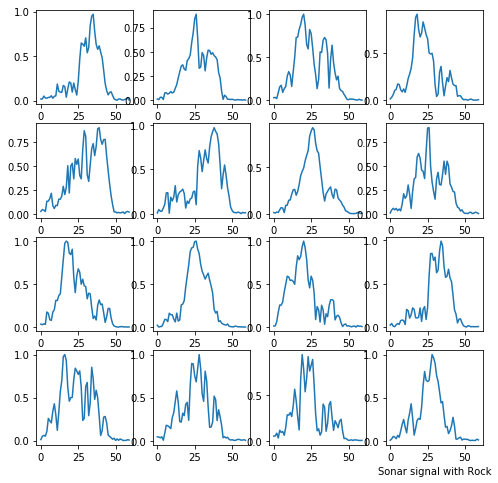

In [7]:
# plot with various axes scales
plt.figure(1)

fig, axs = plt.subplots(4, 4, figsize=(8, 8))
start = 0 
for d in dataPoints:
    if R_or_M(d) and start < 16:
        X = range(60)
        y = df.values[d][:-1]
        axs[start//4, start%4].plot(X,y)
        start += 1
plt.xlabel("Sonar signal with Rock")
plt.show()

<Figure size 432x288 with 0 Axes>

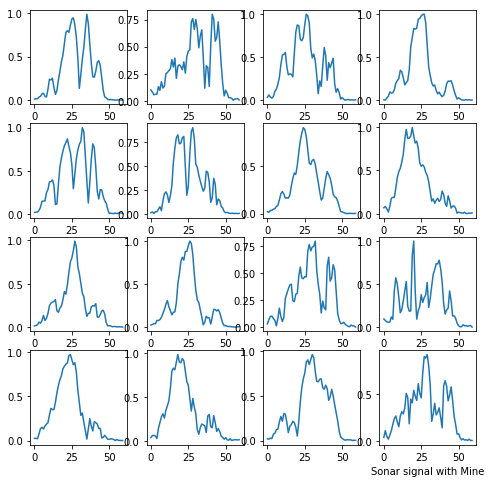

In [8]:
plt.figure(1)

fig, axs = plt.subplots(4, 4, figsize=(8, 8))
start = 0 
for d in dataPoints:
    if not R_or_M(d) and start < 16:
        X = range(60)
        y = df.values[d][:-1]
        axs[start//4, start%4].plot(X,y)
        start += 1
plt.xlabel("Sonar signal with Mine")
plt.show()

In [99]:
dataset = df.values
np.random.shuffle(dataset)
X = dataset[:,:-1]*10
Y = dataset[:,-1]
test_data_size = len(X)//5
y = np.array(list(map(lambda x: 1 if x == "M" else 0, Y)))
X_train, y_train, X_test, y_test = X[:-test_data_size], y[:-test_data_size], X[-test_data_size:], y[-test_data_size:]

In [152]:
model = Sequential()
model.add(Dense(60, activation='relu'))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [146]:
results = []
for _ in range(20):
    model.fit(X_train, y_train, epochs=30, validation_split=0.1, verbose=0)
    results.append(model.evaluate(X_test, y_test, verbose=0)[1])

In [153]:
print("The single dense layer model has a predictive accuracy of {}% in average with a std of {}%".
      format(round(np.mean(results)*100, 2), round(np.std(results)*100, 2)))

The single dense layer model has a predictive accuracy of 87.93% in average with a std of 0.53%


In [132]:
X_RNN_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_RNN_test = np.reshape(X_test, (X_test.shape[0], 1, X_train.shape[1]))
RNN_model = Sequential()
RNN_model.add(LSTM(64, input_shape=(X_RNN_train.shape[1:]), activation="relu"))
model.add(Dropout(0.1))
RNN_model.add(Dense(1, activation='sigmoid'))
RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(RNN_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 64)                32000     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 65        
Total params: 32,065
Trainable params: 32,065
Non-trainable params: 0
_________________________________________________________________
None


In [149]:
results = []
for _ in range(20):
    RNN_model.fit(X_RNN_train, y_train, epochs=32, validation_split=0.1, verbose=0)
    results.append(RNN_model.evaluate(X_RNN_test, y_test, verbose=0)[1])



In [154]:
print("The RNN model has a predictive accuracy of {}% in average with a std of {}%".
      format(round(np.mean(results)*100, 2), round(np.std(results)*100, 2)))

The RNN model has a predictive accuracy of 87.93% in average with a std of 0.53%
